In [33]:
import sys
from pathlib import Path
import os

# Add the src directory to Python path
src_path = Path('../src').resolve()
sys.path.insert(0, str(src_path))

# Always change to the quantitative directory
notebook_dir = Path(__file__).parent if '__file__' in globals() else Path.cwd()
qualitative_dir = notebook_dir.parent if notebook_dir.name == 'results' else notebook_dir
os.chdir(qualitative_dir)


In [34]:
# Build and print the DataFrame exactly as requested
import pandas as pd
import numpy as np

data = [
    # AssistantBench
    {"Benchmark": "AB", "Rubric (short)": "Instruction Violation", "P(flag|task failure)": 0.670, "P(flag|task success)": 0.447, "Δ": 0.22, "Ratio": 1.50},
    {"Benchmark": "AB", "Rubric (short)": "Tool Use Failure",    "P(flag|task failure)": 0.321, "P(flag|task success)": 0.245, "Δ": 0.08, "Ratio": 1.31},
    {"Benchmark": "AB", "Rubric (short)": "Environmental Barrier", "P(flag|task failure)": 0.564, "P(flag|task success)": 0.023, "Δ": 0.54, "Ratio": 24.52},
    # SciCode
    {"Benchmark": "SciCode", "Rubric (short)": "Instruction Violation", "P(flag|task failure)": 0.105, "P(flag|task success)": 0.00,  "Δ": 0.11, "Ratio": np.inf},
    {"Benchmark": "SciCode", "Rubric (short)": "Tool Use Failure",     "P(flag|task failure)": 0.977, "P(flag|task success)": 1.00,  "Δ": -0.03, "Ratio": 0.98},
    {"Benchmark": "SciCode", "Rubric (short)": "Environmental Barrier",  "P(flag|task failure)": 0.438, "P(flag|task success)": 0.280, "Δ": 0.16, "Ratio": 1.56},
    # TauBench
    {"Benchmark": "Tau", "Rubric (short)": "Instruction Violation", "P(flag|task failure)": 0.216, "P(flag|task success)": 0.077, "Δ": 0.14, "Ratio": 2.81},
    {"Benchmark": "Tau", "Rubric (short)": "Tool Use Failure",            "P(flag|task failure)": 0.079, "P(flag|task success)": 0.049, "Δ": 0.03, "Ratio": 1.61},
    {"Benchmark": "Tau", "Rubric (short)": "Environmental Barrier",            "P(flag|task failure)": 0.108, "P(flag|task success)": 0.048, "Δ": 0.06, "Ratio": 2.25},
    # CORE-Bench
    {"Benchmark": "CORE", "Rubric (short)": "Instruction Violation", "P(flag|task failure)": 0.628, "P(flag|task success)": 0.281, "Δ": 0.35, "Ratio": 2.24},
    {"Benchmark": "CORE", "Rubric (short)": "Tool Use Failure",                 "P(flag|task failure)": 0.897, "P(flag|task success)": 0.839, "Δ": 0.06, "Ratio": 1.07},
    {"Benchmark": "CORE", "Rubric (short)": "Environmental Barrier",              "P(flag|task failure)": 0.403, "P(flag|task success)": 0.106, "Δ": 0.30, "Ratio": 3.80},
]

failure_df = pd.DataFrame(data, columns=[
    "Benchmark", "Rubric (short)", "P(flag|task failure)", "P(flag|task success)", "Δ", "Ratio"
])


In [35]:
data = [
    # AssistantBench
    {"Benchmark": "AB", "Rubric (short)": "Self-Correction",                 "P(task success|flag)": 0.756, "P(task success|no flag)": 0.516, "Δ": 0.24,  "RR": 1.47},
    {"Benchmark": "AB", "Rubric (short)": "Verification",                    "P(task success|flag)": 0.767, "P(task success|no flag)": 0.553, "Δ": 0.21,  "RR": 1.39},
    # SciCode
    {"Benchmark": "SciCode",        "Rubric (short)": "Self-Correction",                 "P(task success|flag)": 0.483, "P(task success|no flag)": 0.314, "Δ": 0.37,  "RR": 1.54},
    {"Benchmark": "SciCode",        "Rubric (short)": "Verification",  "P(task success|flag)": 0.502, "P(task success|no flag)": 0.269, "Δ": 0.23,  "RR": 1.87},
    # TauBench
    {"Benchmark": "Tau",       "Rubric (short)": "Self-Correction",                 "P(task success|flag)": 0.451, "P(task success|no flag)": 0.508, "Δ": -0.06, "RR": 0.89},
    {"Benchmark": "Tau",       "Rubric (short)": "Verification",     "P(task success|flag)": 0.506, "P(task success|no flag)": 0.387, "Δ": 0.12,  "RR": 1.31},
    # CORE-Bench
    {"Benchmark": "CORE",     "Rubric (short)": "Self-Correction",                 "P(task success|flag)": 0.288, "P(task success|no flag)": 0.097, "Δ": 0.179, "RR": 2.97},
    {"Benchmark": "CORE",     "Rubric (short)": "Verification","P(task success|flag)": 0.300, "P(task success|no flag)": 0.265, "Δ": 0.035, "RR": 1.13},
]

reliability_df = pd.DataFrame(data, columns=[
    "Benchmark", "Rubric (short)", "P(task success|flag)", "P(task success|no flag)", "Δ", "RR"
])


In [36]:
# filter out benchmark = "Tau" from both dataframes
failure_df = failure_df[failure_df['Benchmark'] != 'Tau']
reliability_df = reliability_df[reliability_df['Benchmark'] != 'Tau']

Saved plot: verification_individual.png


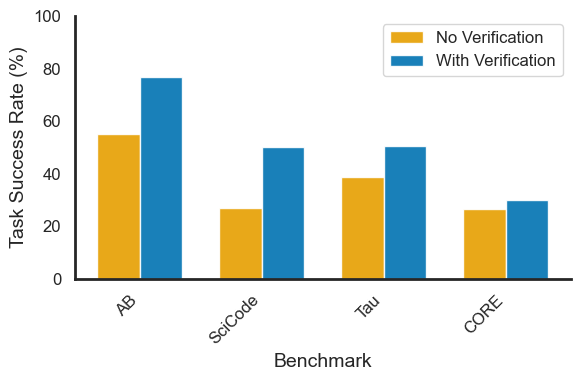

Saved plot: self_correction_individual.png


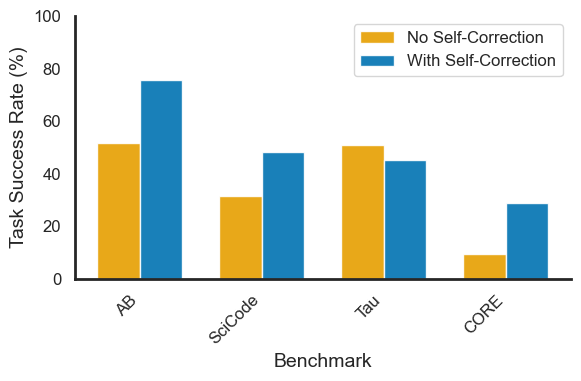

Saved plot: instruction_violation_individual.png


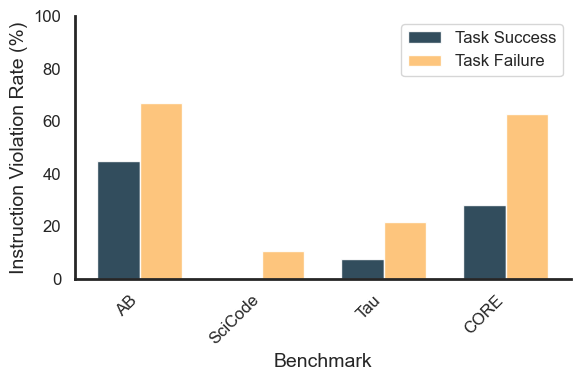

Saved plot: tool_use_failure_individual.png


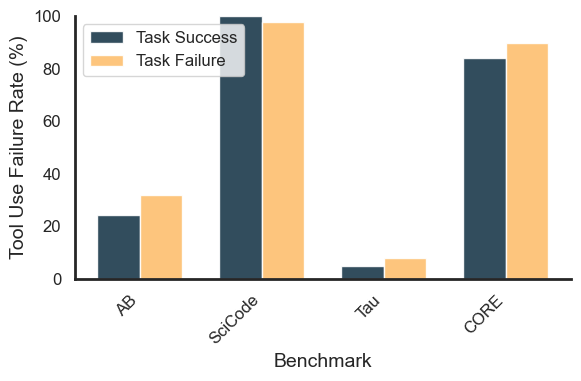

Saved plot: environmental_barrier_individual.png


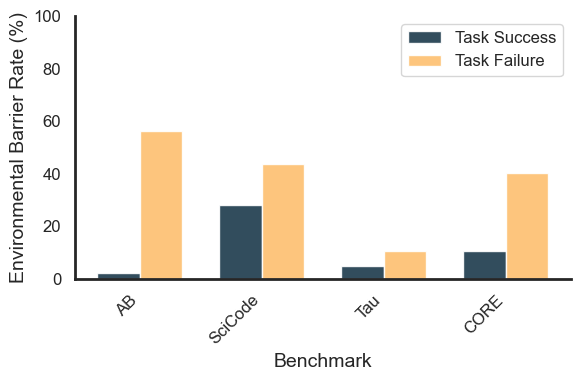

In [21]:
# Statement 1: Agents use tools to verify candidate solutions and increase likelihood of success
import matplotlib.pyplot as plt
import seaborn as sns
import os

verification_data = reliability_df[reliability_df["Rubric (short)"] == "Verification"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x_pos = range(len(verification_data))
width = 0.35

bars1 = ax.bar([x - width/2 for x in x_pos], verification_data["P(task success|no flag)"] * 100, 
               width, label='No Verification', color='#E69F00', alpha=0.9)
bars2 = ax.bar([x + width/2 for x in x_pos], verification_data["P(task success|flag)"] * 100, 
               width, label='With Verification', color='#0072B2', alpha=0.9)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Task Success Rate (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(verification_data["Benchmark"], rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

# Save plot
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)
fname = "verification_individual.png"
plt.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=800)
print(f"Saved plot: {fname}")

plt.show()

# Statement 2: Agents are able to self-correct and recover from failed tool calls
correction_data = reliability_df[reliability_df["Rubric (short)"] == "Self-Correction"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x_pos = range(len(correction_data))
width = 0.35

bars1 = ax.bar([x - width/2 for x in x_pos], correction_data["P(task success|no flag)"] * 100, 
               width, label='No Self-Correction', color='#E69F00', alpha=0.9)
bars2 = ax.bar([x + width/2 for x in x_pos], correction_data["P(task success|flag)"] * 100, 
               width, label='With Self-Correction', color='#0072B2', alpha=0.9)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Task Success Rate (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(correction_data["Benchmark"], rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

# Save plot
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)
fname = "self_correction_individual.png"
plt.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=800)
print(f"Saved plot: {fname}")

plt.show()

# Statement 3: Agents often fail tasks because they violate explicit benchmark instructions
instruction_data = failure_df[failure_df["Rubric (short)"] == "Instruction Violation"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x_pos = range(len(instruction_data))
width = 0.35

bars1 = ax.bar([x - width/2 for x in x_pos], instruction_data["P(flag|task success)"] * 100, 
               width, label='Task Success', color='#1B3A4B', alpha=0.9)
bars2 = ax.bar([x + width/2 for x in x_pos], instruction_data["P(flag|task failure)"] * 100, 
               width, label='Task Failure', color='#FDBF6F', alpha=0.9)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Instruction Violation Rate (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(instruction_data["Benchmark"], rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

# Save plot
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)
fname = "instruction_violation_individual.png"
plt.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=800)
print(f"Saved plot: {fname}")

plt.show()

# Statement 4: Many agents struggle to successfully use the tools they are given at all
tool_use_data = failure_df[failure_df["Rubric (short)"] == "Tool Use Failure"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x_pos = range(len(tool_use_data))
width = 0.35

bars1 = ax.bar([x - width/2 for x in x_pos], tool_use_data["P(flag|task success)"] * 100, 
               width, label='Task Success', color='#1B3A4B', alpha=0.9)
bars2 = ax.bar([x + width/2 for x in x_pos], tool_use_data["P(flag|task failure)"] * 100, 
               width, label='Task Failure', color='#FDBF6F', alpha=0.9)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Tool Use Failure Rate (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(tool_use_data["Benchmark"], rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

# Save plot
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)
fname = "tool_use_failure_individual.png"
plt.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=800)
print(f"Saved plot: {fname}")

plt.show()

# Statement 5: Agents often encounter barriers related to scaffold or environment design
env_data = failure_df[failure_df["Rubric (short)"] == "Environmental Barrier"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x_pos = range(len(env_data))
width = 0.35

bars1 = ax.bar([x - width/2 for x in x_pos], env_data["P(flag|task success)"] * 100, 
               width, label='Task Success', color='#1B3A4B', alpha=0.9)
bars2 = ax.bar([x + width/2 for x in x_pos], env_data["P(flag|task failure)"] * 100, 
               width, label='Task Failure', color='#FDBF6F', alpha=0.9)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Environmental Barrier Rate (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(env_data["Benchmark"], rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

# Save plot
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)
fname = "environmental_barrier_individual.png"
plt.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=800)
print(f"Saved plot: {fname}")

plt.show()

In [42]:
# --- Readable small-multiples: square aspect + large fonts + vector export ---
import os, numpy as np, textwrap
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# =================== Global style tuned for small subfigures ===================
sns.set_theme(style="white")
mpl.rcParams.update({
    # Use TrueType fonts in PDFs (no Type 3)
    "pdf.fonttype": 42, "ps.fonttype": 42,

    # Big, readable fonts (will still look crisp when scaled down)
    "font.size": 13,
    "axes.labelsize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 11,
    "legend.fontsize": 9,

    # Thicker lines/spines for small plots
    "axes.linewidth": 1.4,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
})

SQUARE_FIGSIZE = (2.7, 2.7)   # square-ish; height > default to preserve detail
BAR_WIDTH      = 0.44         # fatter bars read better when small
Y_TICK_STEP    = 20           # consistent ticks across panels

def _wrap_labels(labels, width=12):
    """Soft-wrap long benchmark labels onto multiple lines."""
    return ['\n'.join(textwrap.wrap(str(x), width=width)) for x in labels]

def save_pdf_png(fig, basepath_no_ext):
    fig.savefig(basepath_no_ext + ".pdf", bbox_inches="tight")         # vector (preferred)
    fig.savefig(basepath_no_ext + ".png", dpi=600, bbox_inches="tight")# high-res fallback
    plt.close(fig)
    print(f"Saved: {basepath_no_ext}.pdf and .png")

def paired_bar_panel(df, y_left, y_right, labels, ylabel, legend, colors, outname):
    x = np.arange(len(df))
    fig, ax = plt.subplots(figsize=SQUARE_FIGSIZE, constrained_layout=True)

    ax.bar(x - BAR_WIDTH/2, df[y_left]*100,  BAR_WIDTH,
           label=legend[0], color=colors[0], alpha=0.95,
           edgecolor="black", linewidth=0.7)
    ax.bar(x + BAR_WIDTH/2, df[y_right]*100, BAR_WIDTH,
           label=legend[1], color=colors[1], alpha=0.95,
           edgecolor="black", linewidth=0.7)

    ax.set_ylabel(ylabel, labelpad=4)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(Y_TICK_STEP))

    ax.set_xticks(x)
    ax.set_xticklabels(_wrap_labels(labels), rotation=0, ha="center")

    # Clean, high-contrast axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", linestyle=":", linewidth=0.8, alpha=0.6)

    # Legend above plot to free horizontal space
    ax.legend(loc="upper center", bbox_to_anchor=(0.4, 1.15),
              ncol=2, frameon=False, handlelength=1.8, columnspacing=1.2)

    save_pdf_png(fig, os.path.join(output_path, outname))

# ============================ Your five panels ================================
output_path = str(qualitative_dir / "results/plots/")
os.makedirs(output_path, exist_ok=True)

# 1) Verification (success conditional on flag)
verification_data = reliability_df[reliability_df["Rubric (short)"] == "Verification"].reset_index(drop=True)
paired_bar_panel(
    verification_data,
    y_left="P(task success|no flag)",
    y_right="P(task success|flag)",
    labels=verification_data["Benchmark"],
    ylabel="Task Success Rate (%)",
    legend=("No Verification", "With Verification"),
    colors=("#E69F00", "#0072B2"),
    outname="verification_individual"
)

# 2) Self-Correction (success conditional on flag)
correction_data = reliability_df[reliability_df["Rubric (short)"] == "Self-Correction"].reset_index(drop=True)
paired_bar_panel(
    correction_data,
    y_left="P(task success|no flag)",
    y_right="P(task success|flag)",
    labels=correction_data["Benchmark"],
    ylabel="Task Success Rate (%)",
    legend=("No Self-Correction", "Self-Correction"),
    colors=("#E69F00", "#0072B2"),
    outname="self_correction_individual"
)

# 3) Instruction Violation (flag conditional on outcome)
instruction_data = failure_df[failure_df["Rubric (short)"] == "Instruction Violation"].reset_index(drop=True)
paired_bar_panel(
    instruction_data,
    y_left="P(flag|task success)",
    y_right="P(flag|task failure)",
    labels=instruction_data["Benchmark"],
    ylabel="Instruction Violation Rate (%)",
    legend=("Task Success", "Task Failure"),
    colors=("#1B3A4B", "#FDBF6F"),
    outname="instruction_violation_individual"
)

# 4) Tool Use Failure (flag conditional on outcome)
tool_use_data = failure_df[failure_df["Rubric (short)"] == "Tool Use Failure"].reset_index(drop=True)
paired_bar_panel(
    tool_use_data,
    y_left="P(flag|task success)",
    y_right="P(flag|task failure)",
    labels=tool_use_data["Benchmark"],
    ylabel="Tool Use Failure Rate (%)",
    legend=("Task Success", "Task Failure"),
    colors=("#1B3A4B", "#FDBF6F"),
    outname="tool_use_failure_individual"
)

# 5) Environmental Barrier (flag conditional on outcome)
env_data = failure_df[failure_df["Rubric (short)"] == "Environmental Barrier"].reset_index(drop=True)
paired_bar_panel(
    env_data,
    y_left="P(flag|task success)",
    y_right="P(flag|task failure)",
    labels=env_data["Benchmark"],
    ylabel="Environmental Barrier Rate (%)",
    legend=("Task Success", "Task Failure"),
    colors=("#1B3A4B", "#FDBF6F"),
    outname="environmental_barrier_individual"
)

Saved: /Users/peterkirgis/Documents/hal-paper-analysis/qualitative/results/plots/verification_individual.pdf and .png
Saved: /Users/peterkirgis/Documents/hal-paper-analysis/qualitative/results/plots/self_correction_individual.pdf and .png
Saved: /Users/peterkirgis/Documents/hal-paper-analysis/qualitative/results/plots/instruction_violation_individual.pdf and .png
Saved: /Users/peterkirgis/Documents/hal-paper-analysis/qualitative/results/plots/tool_use_failure_individual.pdf and .png
Saved: /Users/peterkirgis/Documents/hal-paper-analysis/qualitative/results/plots/environmental_barrier_individual.pdf and .png


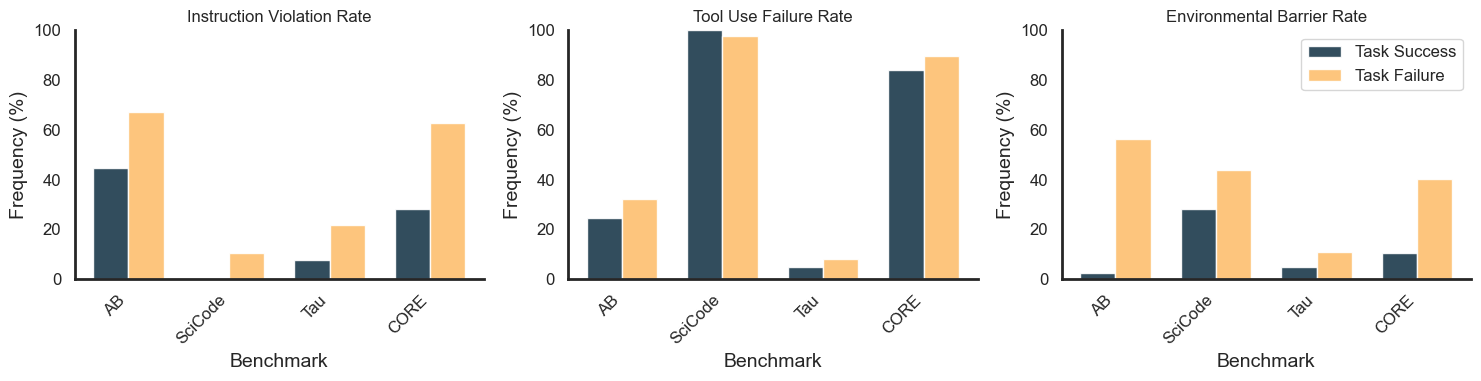

Saved plot: failure_modes.png


In [23]:
# Failure metrics faceted plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Instruction Violations
instruction_data = failure_df[failure_df["Rubric (short)"] == "Instruction Violation"]
x_pos = range(len(instruction_data))
width = 0.35

axes[0].bar([x - width/2 for x in x_pos], instruction_data["P(flag|task success)"] * 100, 
           width, label='Task Success', color='#1B3A4B', alpha=0.9)
axes[0].bar([x + width/2 for x in x_pos], instruction_data["P(flag|task failure)"] * 100, 
           width, label='Task Failure', color='#FDBF6F', alpha=0.9)
axes[0].set_xlabel('Benchmark')
axes[0].set_ylabel('Frequency (%)')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(instruction_data["Benchmark"], rotation=45, ha='right')
axes[0].set_ylim(0, 100)
# axes[0].legend()
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(2)
axes[0].spines['bottom'].set_linewidth(2)
# Set title
axes[0].set_title('Instruction Violation Rate')

# Tool Use Failures
tool_use_data = failure_df[failure_df["Rubric (short)"] == "Tool Use Failure"]

axes[1].bar([x - width/2 for x in x_pos], tool_use_data["P(flag|task success)"] * 100, 
           width, label='Task Success', color="#1B3A4B", alpha=0.9)
axes[1].bar([x + width/2 for x in x_pos], tool_use_data["P(flag|task failure)"] * 100, 
           width, label='Task Failure', color='#FDBF6F', alpha=0.9)
axes[1].set_xlabel('Benchmark')
axes[1].set_ylabel('Frequency (%)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(tool_use_data["Benchmark"], rotation=45, ha='right')
axes[1].set_ylim(0, 100)
# axes[1].legend()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(2)
axes[1].spines['bottom'].set_linewidth(2)
# Set title
axes[1].set_title('Tool Use Failure Rate')

# Environmental Barriers
env_data = failure_df[failure_df["Rubric (short)"] == "Environmental Barrier"]

axes[2].bar([x - width/2 for x in x_pos], env_data["P(flag|task success)"] * 100, 
           width, label='Task Success', color='#1B3A4B', alpha=0.9)
axes[2].bar([x + width/2 for x in x_pos], env_data["P(flag|task failure)"] * 100, 
           width, label='Task Failure', color="#FDBF6F", alpha=0.9)
axes[2].set_xlabel('Benchmark')
axes[2].set_ylabel('Frequency (%)')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(env_data["Benchmark"], rotation=45, ha='right')
axes[2].set_ylim(0, 100)
axes[2].legend()
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_linewidth(2)
axes[2].spines['bottom'].set_linewidth(2)
# Set title
axes[2].set_title('Environmental Barrier Rate')

plt.tight_layout()
plt.show()


output_path = str(qualitative_dir / "results/plots/")
fname = "failure_modes.png"
fig.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=300)
print(f"Saved plot: {fname}")

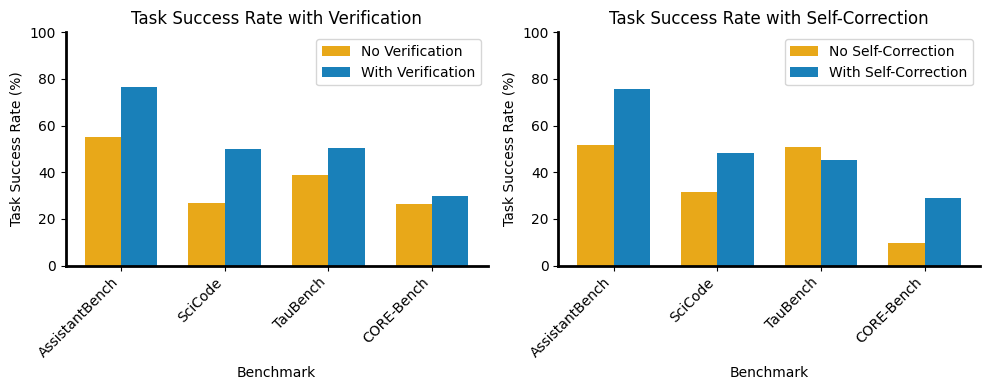

Saved plot: reliablity_metrics.png


In [57]:
# Reliability metrics faceted plot  
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Verification
verification_data = reliability_df[reliability_df["Rubric (short)"] == "Verification"]
x_pos = range(len(verification_data))
width = 0.35

axes[0].bar([x - width/2 for x in x_pos], verification_data["P(task success|no flag)"] * 100, 
           width, label='No Verification', color='#E69F00', alpha=0.9)
axes[0].bar([x + width/2 for x in x_pos], verification_data["P(task success|flag)"] * 100, 
           width, label='With Verification', color='#0072B2', alpha=0.9)
axes[0].set_xlabel('Benchmark')
axes[0].set_ylabel('Task Success Rate (%)')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(verification_data["Benchmark"], rotation=45, ha='right')
axes[0].set_ylim(0, 100)
axes[0].legend()
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(2)
axes[0].spines['bottom'].set_linewidth(2)
# Set title
axes[0].set_title('Task Success Rate with Verification')

# Self-Correction
correction_data = reliability_df[reliability_df["Rubric (short)"] == "Self-Correction"]

axes[1].bar([x - width/2 for x in x_pos], correction_data["P(task success|no flag)"] * 100, 
           width, label='No Self-Correction', color='#E69F00', alpha=0.9)
axes[1].bar([x + width/2 for x in x_pos], correction_data["P(task success|flag)"] * 100, 
           width, label='With Self-Correction', color='#0072B2', alpha=0.9)
axes[1].set_xlabel('Benchmark')
axes[1].set_ylabel('Task Success Rate (%)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(correction_data["Benchmark"], rotation=45, ha='right')
axes[1].set_ylim(0, 100)
axes[1].legend()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(2)
axes[1].spines['bottom'].set_linewidth(2)
# Set title
axes[1].set_title('Task Success Rate with Self-Correction')

plt.tight_layout()
plt.show()


output_path = str(qualitative_dir / "results/plots/")
fname = "reliablity_metrics.png"
fig.savefig(os.path.join(output_path, fname), bbox_inches='tight', dpi=300)
print(f"Saved plot: {fname}")